### 1) Loading dataset

* importing necessary libraries to read dataset

In [1]:
import os
import ast
import numpy as np
import pandas as pd
from PIL import Image

* setting paths for dataset files

In [2]:
# setting paths for train and test data
train_dir = "train"
train_annot_path = os.path.join(train_dir, "annotation.txt")

test_dir = "test"
test_annot_path = os.path.join(test_dir, "annotation.txt")

# setting paths for classes.txt
classes_txt_path = "classes.txt"

* getting class labels from annotation and class files

In [3]:
# getting class labels from "classes.txt"
with open(classes_txt_path) as file:
    class_map_s2i = {line.rstrip(): i for i, line in enumerate(file.readlines()) if line.rstrip()}

# Add "clutter" to the class_map_s2i
class_map_s2i["clutter"] = len(class_map_s2i)

class_map_i2s = {v: k for k, v in class_map_s2i.items()}

# getting labels for train data from "train/annotation.txt"
with open(train_annot_path) as file:
    train_annots = [line.rstrip().split() for line in file.readlines()]
train_img_path = [os.path.join(train_dir, "0" + train_annot[0][:3], train_annot[0] + ".jpg") for train_annot in train_annots]

# Modify this part to classify as "clutter" if all values are -1.00
train_int_lbl = []
for train_annot in train_annots:
    values = np.array([float(x) for x in train_annot[1:]])
    if np.all(values == -1.00):
        train_int_lbl.append(class_map_s2i["clutter"])  # Use the integer label for "clutter"
    else:
        train_int_lbl.append(np.argmax(values))

# Create train_str_lbl based on train_int_lbl
train_str_lbl = [class_map_i2s[label] for label in train_int_lbl]

# getting labels for test data from "test/annotation.txt"
with open(test_annot_path) as file:
    test_annots = [line.rstrip().split() for line in file.readlines()]
test_img_path = [os.path.join(test_dir, "0" + test_annot[0][:3], test_annot[0] + ".jpg") for test_annot in test_annots]

# Modify this part to classify as "clutter" if all values are -1.00
test_int_lbl = []
for test_annot in test_annots:
    values = np.array([float(x) for x in test_annot[1:]])
    if np.all(values == -1.00):
        test_int_lbl.append(class_map_s2i["clutter"])  # Use the integer label for "clutter"
    else:
        test_int_lbl.append(np.argmax(values))

# Create test_str_lbl based on test_int_lbl
test_str_lbl = [class_map_i2s[label] for label in test_int_lbl]

* creating dataframes for train and test set

In [4]:
# creating dataframes for train and test data
train_df = pd.DataFrame({"img_path":train_img_path, "int_label":train_int_lbl, "str_label":train_str_lbl})
test_df = pd.DataFrame({"img_path":test_img_path, "int_label":test_int_lbl, "str_label":test_str_lbl})

# displaying dataframes
print("\n\nTRAIN DF")
display(train_df)
print(train_df.str_label.value_counts(dropna=False))

print("\n\n\nTEST DF")
display(test_df)
print(test_df.str_label.value_counts())



TRAIN DF


,img_path,int_label,str_label
0,train\0000\000000.jpg,4,tree
1,train\0000\000001.jpg,1,car
2,train\0000\000002.jpg,2,building
3,train\0000\000003.jpg,1,car
4,train\0000\000004.jpg,1,car
...,...,...,...
39995,train\0039\039995.jpg,12,clutter
39996,train\0039\039996.jpg,12,clutter
39997,train\0039\039997.jpg,12,clutter
39998,train\0039\039998.jpg,12,clutter


str_label
clutter      18074
person        5949
window        4146
car           3976
building      2238
tree          2087
sign           969
door           886
chair          428
bookshelf      405
keyboard       350
head           269
table          223
Name: count, dtype: int64



TEST DF


,img_path,int_label,str_label
0,test\0000\000000.jpg,1,car
1,test\0000\000001.jpg,12,clutter
2,test\0000\000002.jpg,1,car
3,test\0000\000003.jpg,1,car
4,test\0000\000004.jpg,12,clutter
...,...,...,...
9995,test\0009\009995.jpg,12,clutter
9996,test\0009\009996.jpg,1,car
9997,test\0009\009997.jpg,2,building
9998,test\0009\009998.jpg,12,clutter


str_label
clutter      4529
person       1407
window       1043
car          1017
building      586
tree          546
sign          259
door          191
chair         106
bookshelf     103
keyboard       84
head           65
table          64
Name: count, dtype: int64


* visualizing the images in the dataset

Image Class: tree
Image Height: 256
Image Width: 256


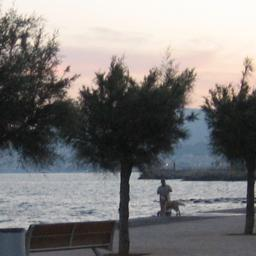

In [5]:
# displaying first image from train data
print(f"Image Class: {train_df.str_label[0]}")
print(f"Image Height: {Image.open(train_df.img_path[0]).height}")
print(f"Image Width: {Image.open(train_df.img_path[0]).width}")
Image.open(train_df.img_path[0])

Image Class: building
Image Height: 256
Image Width: 256


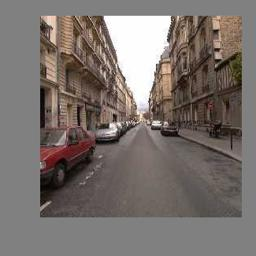

In [6]:
# displaying last image from train data
print(f"Image Class: {train_df.str_label[len(train_df)-1]}")
print(f"Image Height: {Image.open(train_df.img_path[len(train_df)-1]).height}")
print(f"Image Width: {Image.open(train_df.img_path[len(train_df)-1]).width}")
Image.open(train_df.img_path[len(train_df)-1])

Image Class: car
Image Height: 256
Image Width: 256


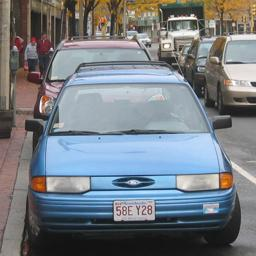

In [7]:
# displaying first image from test data
print(f"Image Class: {test_df.str_label[0]}")
print(f"Image Height: {Image.open(test_df.img_path[0]).height}")
print(f"Image Width: {Image.open(test_df.img_path[0]).width}")
Image.open(test_df.img_path[0])

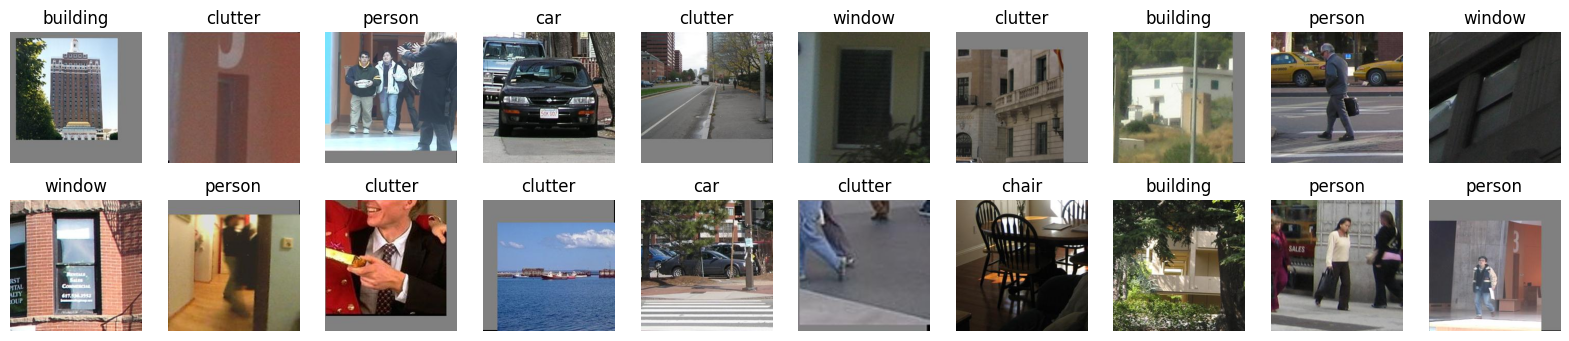

In [8]:
# displaying 10 random images from train and test data each with their class labels
import random
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    rand_int = random.randint(0, len(train_df)-1)
    ax[0, i].imshow(Image.open(train_df.img_path[rand_int]))
    ax[0, i].set_title(train_df.str_label[rand_int])
    ax[0, i].axis("off")

    rand_int = random.randint(0, len(test_df)-1)
    ax[1, i].imshow(Image.open(test_df.img_path[rand_int]))
    ax[1, i].set_title(test_df.str_label[rand_int])
    ax[1, i].axis("off")

<Axes: xlabel='str_label'>

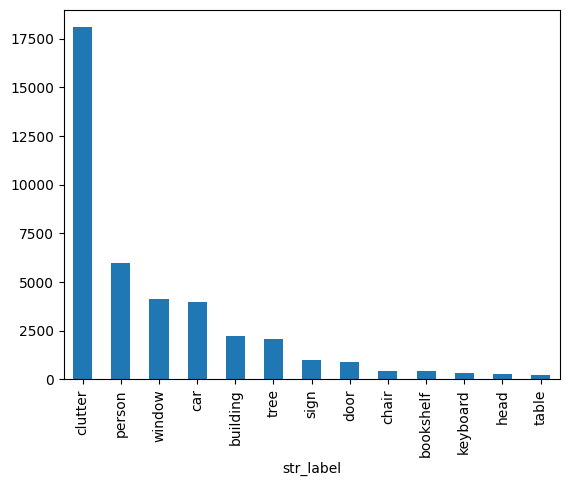

In [9]:
# plotting class distribution for train data
train_df['str_label'].value_counts().plot(kind='bar')

### 2) Creating Dataloaders

* importing necessary libraries for dataloader

In [10]:
import torch
import torchvision
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchinfo import summary

In [11]:
# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

* defining class to load custom dataset

In [12]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        img = Image.open(img_path)
        label = int(self.dataframe.iloc[idx, 1])

        if self.transform:
            img = self.transform(img)

        return img, label


* defining transforms

In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the desired size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])  # Normalized using ImageNet stats
])


* instantiating custom dataset for train and test data

In [14]:
train_dataset = CustomDataset(train_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)

* creating dataloaders for train and test data

In [15]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [16]:
# Find the number of samples/batches per dataloader
print(f"Number of batches of size {batch_size} in training data: {len(train_loader)}")
print(f"Number of batches of size {batch_size} in testing data: {len(test_loader)}")
print(f"Number of classes: {len(class_map_s2i)}, class names: {class_map_s2i}")

Number of batches of size 32 in training data: 1250
Number of batches of size 32 in testing data: 313
Number of classes: 13, class names: {'person': 0, 'car': 1, 'building': 2, 'window': 3, 'tree': 4, 'sign': 5, 'door': 6, 'bookshelf': 7, 'chair': 8, 'table': 9, 'keyboard': 10, 'head': 11, 'clutter': 12}


### 3) Setting up device agnostic code

In [17]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 4) Defining Models that we are going to test

In [18]:
# setting the number of output features
OUT_FEATURES = len(class_map_s2i)

In [19]:
# create an instance of EfficientNet-B0
def create_effnet_b0():
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    model = torchvision.models.efficientnet_b0(weights=weights).to(device)

    # set the seeds for reproducibility
    set_seeds()

    # change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=1280, out_features=OUT_FEATURES, bias=True)
    ).to(device)

    # Give the model a name
    model.name = "EfficientNet-B0"
    print(f"[INFO] Created new {model.name} model.")
    return model

# create an instance of EfficientNet-B1
def create_effnet_b1():
    weights = torchvision.models.EfficientNet_B1_Weights.DEFAULT
    model = torchvision.models.efficientnet_b1(weights=weights).to(device)

    # set the seeds for reproducibility
    set_seeds()

    # change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=1280, out_features=OUT_FEATURES, bias=True)
    ).to(device)

    # Give the model a name
    model.name = "EfficientNet-B1"
    print(f"[INFO] Created new {model.name} model.")
    return model

# create an instance of MobileNet-V2
def create_mobilenet_v2():
    weights = torchvision.models.MobileNet_V2_Weights.DEFAULT
    model = torchvision.models.mobilenet_v2(weights=weights).to(device)

    # set the seeds for reproducibility
    set_seeds()

    # change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=1280, out_features=OUT_FEATURES, bias=True)
    ).to(device)

    # Give the model a name
    model.name = "MobileNet-V2"
    print(f"[INFO] Created new {model.name} model.")
    return model

# create an instance of MobileNet-V3 small
def create_mobilenet_v3_small():
    weights = torchvision.models.MobileNet_V3_Small_Weights.DEFAULT
    model = torchvision.models.mobilenet_v3_small(weights=weights).to(device)

    # set the seeds for reproducibility
    set_seeds()

    # change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=576, out_features=OUT_FEATURES, bias=True)
    ).to(device)

    # Give the model a name
    model.name = "MobileNet-V3-small"
    print(f"[INFO] Created new {model.name} model.")
    return model

# create an instance of MobileNet-V3 LARGE
def create_mobilenet_v3_large():
    weights = torchvision.models.MobileNet_V3_Large_Weights.DEFAULT
    model = torchvision.models.mobilenet_v3_large(weights=weights).to(device)

    # set the seeds for reproducibility
    set_seeds()

    # change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=960, out_features=OUT_FEATURES, bias=True)
    ).to(device)

    # Give the model a name
    model.name = "MobileNet-V3-large"
    print(f"[INFO] Created new {model.name} model.")
    return model

In [20]:
# 1. Create epochs list
num_epochs = [5, 10]

# 2. Create models list (need to create a new model for each experiment)
models = ["EfficientNet-B0", "EfficientNet-B1", "MobileNet-V2", "MobileNet-V3-small", "MobileNet-V3-large"]

### 5) Running experiments

In [21]:
%%time
import engine
from pathlib import Path
from utils import save_model

# Initialize an empty dictionary to store the results
results_dict = {}

# 1. Set the random seeds
set_seeds(seed=42)

# 2. Keep track of experiment numbers
experiment_number = 0

# 3. Loop through each number of epochs
for epochs in num_epochs:

    # 5. Loop through each model name and create a new model based on the name
    for model_name in models:

        # 6. Create information print outs
        experiment_number += 1
        print(f"[INFO] Experiment number: {experiment_number}")
        print(f"[INFO] Model: {model_name}")
        print(f"[INFO] Number of epochs: {epochs}")  

        # 7. Select the model
        if model_name == "EfficientNet-B0":
            model = create_effnet_b0() # creates a new model each time (important because we want each experiment to start from scratch)

        elif model_name == "EfficientNet-B1":
            model = create_effnet_b1() 

        elif model_name == "MobileNet-V2":
            model = create_mobilenet_v2()

        elif model_name == "MobileNet-V3-small":
            model = create_mobilenet_v3_small()
        else:
            model = create_mobilenet_v3_large()
            
        # 8. Create a new loss and optimizer for every model
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

        # 9. Train target model with target dataloaders and track experiments
        results = engine.train(model=model,
                               train_dataloader=train_loader,
                               test_dataloader=test_loader, 
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=epochs,
                               device=device)

        # 10. Save the model
        save_filepath = f"{model_name}_{epochs}_epochs.pth"
        save_model(model=model,
                   target_dir="models",
                   model_name=save_filepath)

        # Save model accuracy and size in the results dictionary
        results_dict[f"{model_name}_{epochs}"] = {
            "accuracy": results["test_acc"][-1],
            "size_MB": Path(f"models/{save_filepath}").stat().st_size // (1024 * 1024)
        }

        # Print the results
        print(f"Trained Model Size: {results_dict[f'{model_name}_{epochs}']['size_MB']} MB | Trained Model Accuracy: {results_dict[f'{model_name}_{epochs}']['accuracy'] * 100:.2f}%")
        print("-" * 100 + "\n")

[INFO] Experiment number: 1
[INFO] Model: EfficientNet-B0
[INFO] Number of epochs: 5
[INFO] Created new EfficientNet-B0 model.


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4078 | train_acc: 0.8732 | test_loss: 0.2832 | test_acc: 0.9082
Epoch: 2 | train_loss: 0.2592 | train_acc: 0.9182 | test_loss: 0.2714 | test_acc: 0.9185
Epoch: 3 | train_loss: 0.2148 | train_acc: 0.9311 | test_loss: 0.2841 | test_acc: 0.9138
Epoch: 4 | train_loss: 0.1833 | train_acc: 0.9393 | test_loss: 0.2628 | test_acc: 0.9228
Epoch: 5 | train_loss: 0.1587 | train_acc: 0.9469 | test_loss: 0.2921 | test_acc: 0.9196
[INFO] Saving model to: models\EfficientNet-B0_5_epochs.pth
Trained Model Size: 15 MB | Trained Model Accuracy: 91.96%
----------------------------------------------------------------------------------------------------

[INFO] Experiment number: 2
[INFO] Model: EfficientNet-B1
[INFO] Number of epochs: 5
[INFO] Created new EfficientNet-B1 model.


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3708 | train_acc: 0.8832 | test_loss: 0.2506 | test_acc: 0.9157
Epoch: 2 | train_loss: 0.2206 | train_acc: 0.9286 | test_loss: 0.2505 | test_acc: 0.9220
Epoch: 3 | train_loss: 0.1791 | train_acc: 0.9402 | test_loss: 0.2543 | test_acc: 0.9221
Epoch: 4 | train_loss: 0.1471 | train_acc: 0.9495 | test_loss: 0.2470 | test_acc: 0.9250
Epoch: 5 | train_loss: 0.1203 | train_acc: 0.9575 | test_loss: 0.2615 | test_acc: 0.9324
[INFO] Saving model to: models\EfficientNet-B1_5_epochs.pth
Trained Model Size: 25 MB | Trained Model Accuracy: 93.24%
----------------------------------------------------------------------------------------------------

[INFO] Experiment number: 3
[INFO] Model: MobileNet-V2
[INFO] Number of epochs: 5
[INFO] Created new MobileNet-V2 model.


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4153 | train_acc: 0.8707 | test_loss: 0.2999 | test_acc: 0.9050
Epoch: 2 | train_loss: 0.2755 | train_acc: 0.9131 | test_loss: 0.2846 | test_acc: 0.9119
Epoch: 3 | train_loss: 0.2326 | train_acc: 0.9247 | test_loss: 0.2875 | test_acc: 0.9107
Epoch: 4 | train_loss: 0.2122 | train_acc: 0.9304 | test_loss: 0.2671 | test_acc: 0.9205
Epoch: 5 | train_loss: 0.1867 | train_acc: 0.9387 | test_loss: 0.2997 | test_acc: 0.9123
[INFO] Saving model to: models\MobileNet-V2_5_epochs.pth
Trained Model Size: 8 MB | Trained Model Accuracy: 91.23%
----------------------------------------------------------------------------------------------------

[INFO] Experiment number: 4
[INFO] Model: MobileNet-V3-small
[INFO] Number of epochs: 5
[INFO] Created new MobileNet-V3-small model.


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4400 | train_acc: 0.8592 | test_loss: 0.3352 | test_acc: 0.8939
Epoch: 2 | train_loss: 0.2687 | train_acc: 0.9125 | test_loss: 0.3161 | test_acc: 0.9032
Epoch: 3 | train_loss: 0.2096 | train_acc: 0.9301 | test_loss: 0.3117 | test_acc: 0.9064
Epoch: 4 | train_loss: 0.1765 | train_acc: 0.9395 | test_loss: 0.2974 | test_acc: 0.9105
Epoch: 5 | train_loss: 0.1472 | train_acc: 0.9494 | test_loss: 0.3372 | test_acc: 0.9055
[INFO] Saving model to: models\MobileNet-V3-small_5_epochs.pth
Trained Model Size: 3 MB | Trained Model Accuracy: 90.55%
----------------------------------------------------------------------------------------------------

[INFO] Experiment number: 5
[INFO] Model: MobileNet-V3-large
[INFO] Number of epochs: 5
[INFO] Created new MobileNet-V3-large model.


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3973 | train_acc: 0.8759 | test_loss: 0.3310 | test_acc: 0.8983
Epoch: 2 | train_loss: 0.2450 | train_acc: 0.9219 | test_loss: 0.3088 | test_acc: 0.9012
Epoch: 3 | train_loss: 0.2011 | train_acc: 0.9343 | test_loss: 0.2917 | test_acc: 0.9091
Epoch: 4 | train_loss: 0.1700 | train_acc: 0.9429 | test_loss: 0.2812 | test_acc: 0.9138
Epoch: 5 | train_loss: 0.1435 | train_acc: 0.9516 | test_loss: 0.3199 | test_acc: 0.9056
[INFO] Saving model to: models\MobileNet-V3-large_5_epochs.pth
Trained Model Size: 11 MB | Trained Model Accuracy: 90.56%
----------------------------------------------------------------------------------------------------

[INFO] Experiment number: 6
[INFO] Model: EfficientNet-B0
[INFO] Number of epochs: 10
[INFO] Created new EfficientNet-B0 model.


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4062 | train_acc: 0.8741 | test_loss: 0.2914 | test_acc: 0.9090
Epoch: 2 | train_loss: 0.2578 | train_acc: 0.9182 | test_loss: 0.2652 | test_acc: 0.9222
Epoch: 3 | train_loss: 0.2140 | train_acc: 0.9295 | test_loss: 0.2617 | test_acc: 0.9194
Epoch: 4 | train_loss: 0.1864 | train_acc: 0.9393 | test_loss: 0.2627 | test_acc: 0.9222
Epoch: 5 | train_loss: 0.1562 | train_acc: 0.9477 | test_loss: 0.2829 | test_acc: 0.9224
Epoch: 6 | train_loss: 0.1351 | train_acc: 0.9544 | test_loss: 0.2796 | test_acc: 0.9198
Epoch: 7 | train_loss: 0.1165 | train_acc: 0.9597 | test_loss: 0.2930 | test_acc: 0.9181
Epoch: 8 | train_loss: 0.1022 | train_acc: 0.9649 | test_loss: 0.2966 | test_acc: 0.9187
Epoch: 9 | train_loss: 0.0851 | train_acc: 0.9697 | test_loss: 0.3371 | test_acc: 0.9189
Epoch: 10 | train_loss: 0.0777 | train_acc: 0.9730 | test_loss: 0.3620 | test_acc: 0.9165
[INFO] Saving model to: models\EfficientNet-B0_10_epochs.pth
Trained Model Size: 15 MB | Trained Model Accura

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3663 | train_acc: 0.8838 | test_loss: 0.2608 | test_acc: 0.9119
Epoch: 2 | train_loss: 0.2198 | train_acc: 0.9296 | test_loss: 0.2258 | test_acc: 0.9325
Epoch: 3 | train_loss: 0.1770 | train_acc: 0.9412 | test_loss: 0.2583 | test_acc: 0.9231
Epoch: 4 | train_loss: 0.1423 | train_acc: 0.9507 | test_loss: 0.2333 | test_acc: 0.9314
Epoch: 5 | train_loss: 0.1203 | train_acc: 0.9585 | test_loss: 0.2784 | test_acc: 0.9266
Epoch: 6 | train_loss: 0.0972 | train_acc: 0.9661 | test_loss: 0.2823 | test_acc: 0.9245
Epoch: 7 | train_loss: 0.0804 | train_acc: 0.9718 | test_loss: 0.2931 | test_acc: 0.9244
Epoch: 8 | train_loss: 0.0715 | train_acc: 0.9748 | test_loss: 0.2883 | test_acc: 0.9307
Epoch: 9 | train_loss: 0.0588 | train_acc: 0.9794 | test_loss: 0.3260 | test_acc: 0.9243
Epoch: 10 | train_loss: 0.0523 | train_acc: 0.9826 | test_loss: 0.3441 | test_acc: 0.9205
[INFO] Saving model to: models\EfficientNet-B1_10_epochs.pth
Trained Model Size: 25 MB | Trained Model Accura

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4182 | train_acc: 0.8689 | test_loss: 0.3243 | test_acc: 0.8956
Epoch: 2 | train_loss: 0.2808 | train_acc: 0.9108 | test_loss: 0.2785 | test_acc: 0.9137
Epoch: 3 | train_loss: 0.2338 | train_acc: 0.9250 | test_loss: 0.2645 | test_acc: 0.9168
Epoch: 4 | train_loss: 0.2123 | train_acc: 0.9310 | test_loss: 0.2647 | test_acc: 0.9203
Epoch: 5 | train_loss: 0.1865 | train_acc: 0.9391 | test_loss: 0.2811 | test_acc: 0.9151
Epoch: 6 | train_loss: 0.1677 | train_acc: 0.9444 | test_loss: 0.3009 | test_acc: 0.9112
Epoch: 7 | train_loss: 0.1477 | train_acc: 0.9509 | test_loss: 0.2902 | test_acc: 0.9165
Epoch: 8 | train_loss: 0.1331 | train_acc: 0.9551 | test_loss: 0.2866 | test_acc: 0.9167
Epoch: 9 | train_loss: 0.1218 | train_acc: 0.9585 | test_loss: 0.3194 | test_acc: 0.9131
Epoch: 10 | train_loss: 0.1093 | train_acc: 0.9619 | test_loss: 0.3278 | test_acc: 0.9127
[INFO] Saving model to: models\MobileNet-V2_10_epochs.pth
Trained Model Size: 8 MB | Trained Model Accuracy: 

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4417 | train_acc: 0.8591 | test_loss: 0.3538 | test_acc: 0.8865
Epoch: 2 | train_loss: 0.2717 | train_acc: 0.9102 | test_loss: 0.3472 | test_acc: 0.8988
Epoch: 3 | train_loss: 0.2093 | train_acc: 0.9312 | test_loss: 0.3916 | test_acc: 0.8908
Epoch: 4 | train_loss: 0.1759 | train_acc: 0.9408 | test_loss: 0.2990 | test_acc: 0.9095
Epoch: 5 | train_loss: 0.1455 | train_acc: 0.9490 | test_loss: 0.3506 | test_acc: 0.9009
Epoch: 6 | train_loss: 0.1239 | train_acc: 0.9565 | test_loss: 0.3518 | test_acc: 0.8996
Epoch: 7 | train_loss: 0.1023 | train_acc: 0.9643 | test_loss: 0.3586 | test_acc: 0.9002
Epoch: 8 | train_loss: 0.0893 | train_acc: 0.9680 | test_loss: 0.3526 | test_acc: 0.9079
Epoch: 9 | train_loss: 0.0752 | train_acc: 0.9739 | test_loss: 0.4163 | test_acc: 0.9025
Epoch: 10 | train_loss: 0.0661 | train_acc: 0.9762 | test_loss: 0.3849 | test_acc: 0.9155
[INFO] Saving model to: models\MobileNet-V3-small_10_epochs.pth
Trained Model Size: 3 MB | Trained Model Accu

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3996 | train_acc: 0.8751 | test_loss: 0.3119 | test_acc: 0.9028
Epoch: 2 | train_loss: 0.2451 | train_acc: 0.9223 | test_loss: 0.3134 | test_acc: 0.8992
Epoch: 3 | train_loss: 0.1985 | train_acc: 0.9341 | test_loss: 0.3307 | test_acc: 0.9013
Epoch: 4 | train_loss: 0.1673 | train_acc: 0.9450 | test_loss: 0.2779 | test_acc: 0.9165
Epoch: 5 | train_loss: 0.1448 | train_acc: 0.9521 | test_loss: 0.2724 | test_acc: 0.9167
Epoch: 6 | train_loss: 0.1259 | train_acc: 0.9564 | test_loss: 0.2863 | test_acc: 0.9210
Epoch: 7 | train_loss: 0.1078 | train_acc: 0.9630 | test_loss: 0.3214 | test_acc: 0.9203
Epoch: 8 | train_loss: 0.0878 | train_acc: 0.9689 | test_loss: 0.3217 | test_acc: 0.9116
Epoch: 9 | train_loss: 0.0773 | train_acc: 0.9727 | test_loss: 0.3377 | test_acc: 0.9183
Epoch: 10 | train_loss: 0.0721 | train_acc: 0.9747 | test_loss: 0.3564 | test_acc: 0.9109
[INFO] Saving model to: models\MobileNet-V3-large_10_epochs.pth
Trained Model Size: 11 MB | Trained Model Acc

### 6) Creating dataframe of results and visualizing them

In [23]:
import pandas as pd

# Create a list of dictionaries for the dataframe
data = []
for key, value in results_dict.items():
    model_name, epochs = key.split("_")
    data.append({'Model': model_name, 'Accuracy': value['accuracy'], 'Size': value['size_MB']})

# Create a pandas DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(results_df)

                Model  Accuracy  Size
0     EfficientNet-B0  0.919629    15
1     EfficientNet-B1  0.932408    25
2        MobileNet-V2  0.912340     8
3  MobileNet-V3-small  0.905451     3
4  MobileNet-V3-large  0.905551    11
5     EfficientNet-B0  0.916534    15
6     EfficientNet-B1  0.920527    25
7        MobileNet-V2  0.912740     8
8  MobileNet-V3-small  0.915535     3
9  MobileNet-V3-large  0.910942    11


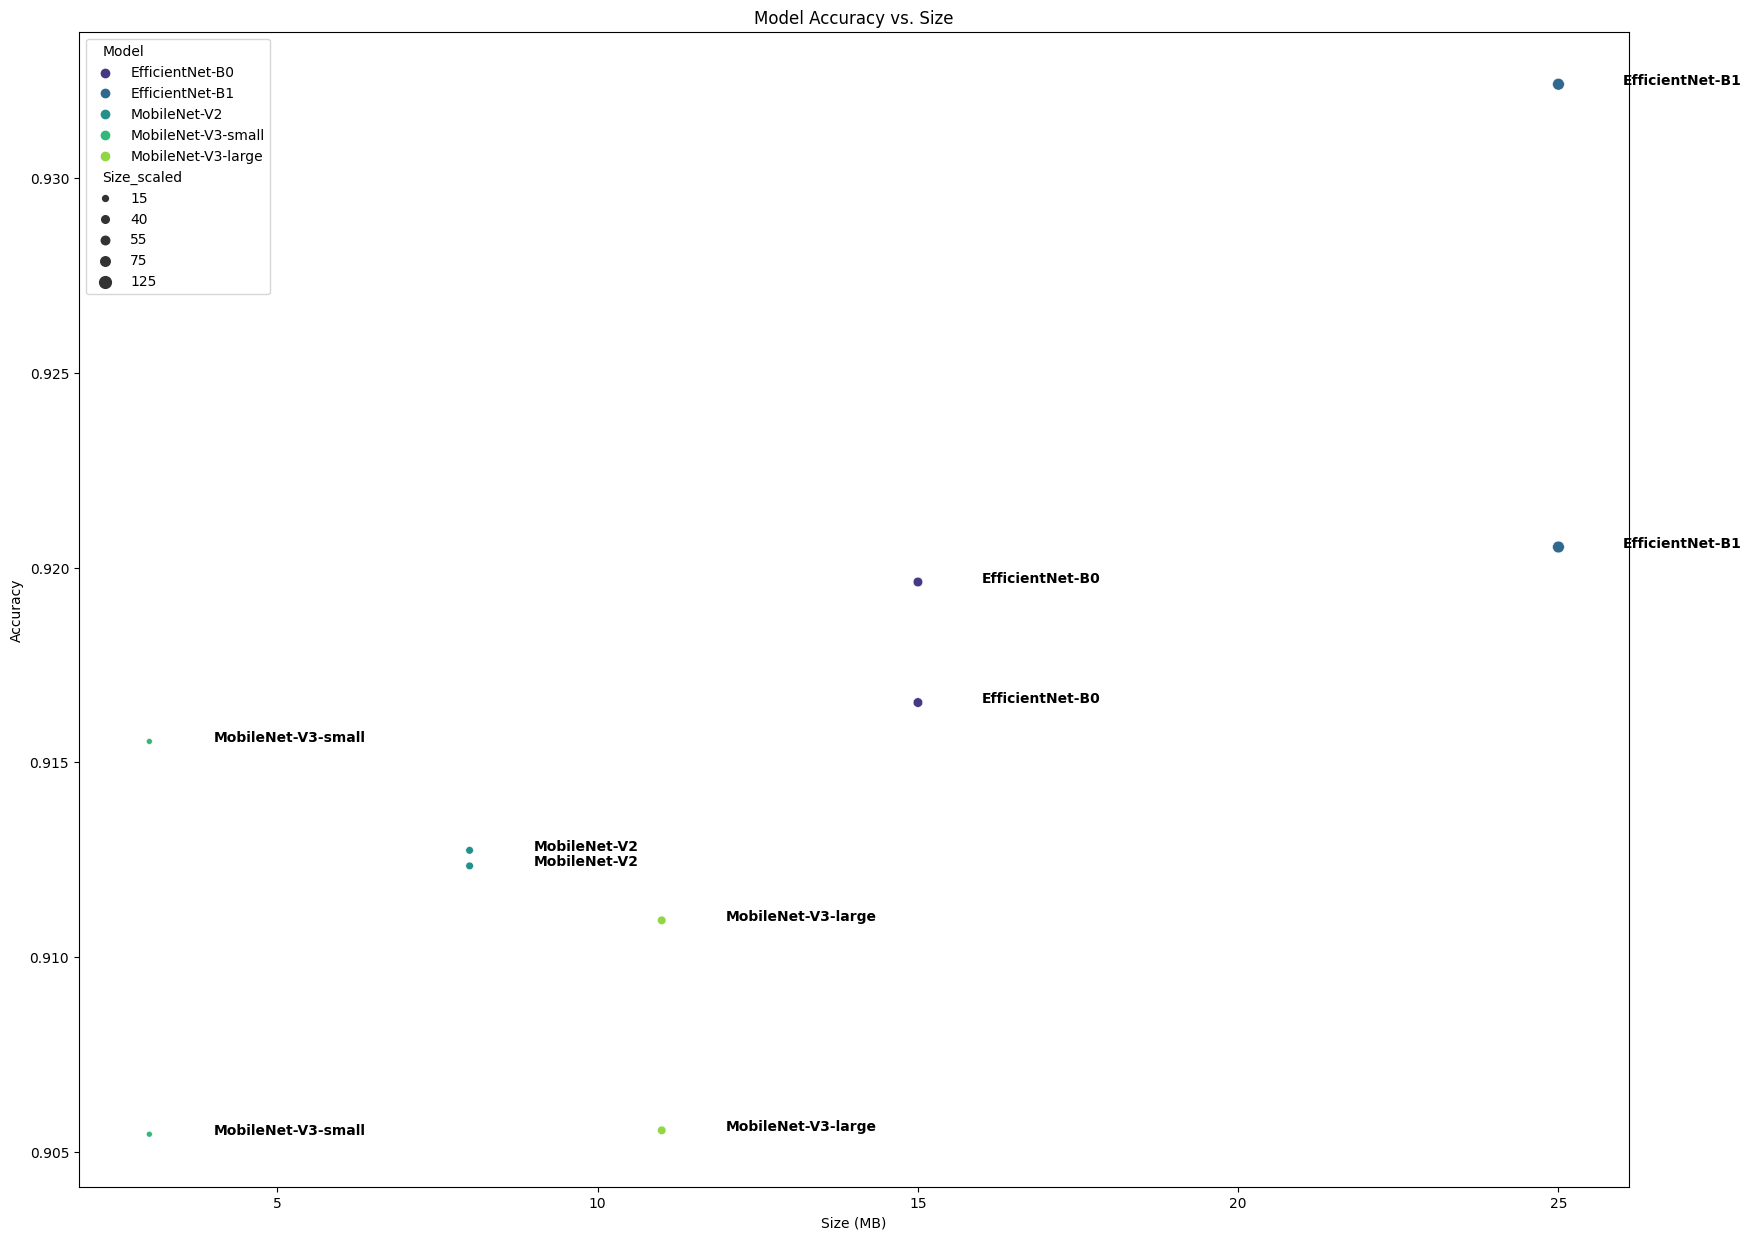

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the 'Size' column for point size
results_df['Size_scaled'] = results_df['Size'] * 5  # Adjust the scaling factor as needed

# Create the scatter plot
plt.figure(figsize=(20, 15))
scatterplot = sns.scatterplot(data=results_df, x='Size', y='Accuracy', hue='Model', palette='viridis', size='Size_scaled')

# Add model names as labels to each point
for line in range(0, results_df.shape[0]):
    scatterplot.text(results_df['Size'][line] + 1, results_df['Accuracy'][line], results_df['Model'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

# Set labels and title
plt.xlabel('Size (MB)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Size')

# Show the plot
plt.show()

* looking at these results, we can see that the best choice of model based on performance to size ratio is MobileNet-V3-small trained for 10 epochs